#  EXAMPLE 5: Calculate full SPOD spectrum of large data.
The large-eddy simulation data provided along with this example is a subset of the database of a Mach 0.9 turbulent jet described in [1] and was calculated using the unstructured flow solver Charles developed at Cascade Technologies. If you are using the database in your research or teaching, please include explicit mention of Brès et al. [1]. The test database consists of 5000 snapshots of the symmetric component (m=0) of a round turbulent jet. A physical interpretaion of the SPOD results is given in [2], and a comprehensive discussion and derivation of SPOD and many of its properties can be found in [3].

### References:
1. G. A. Brès, P. Jordan, M. Le Rallic, V. Jaunet, A. V. G. Cavalieri, A. Towne, S. K. Lele, T. Colonius, O. T. Schmidt, Importance of the nozzle-exit boundary-layer state in subsonic turbulent jets, J. of Fluid Mech. 851, 83-124, 2018
2. Schmidt, O. T. and Towne, A. and Rigas, G. and Colonius, T. and Bres, G. A., Spectral analysis of jet turbulence, J. of Fluid Mech. 855, 953–982, 2018
3. Towne, A. and Schmidt, O. T. and Colonius, T., Spectral proper orthogonal decomposition and its relationship to dynamic mode decomposition and resolvent analysis, J. of Fluid Mech. 847, 821–867, 2018

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from spod import spod
from utils import trapzWeightsPolar, getjet
import os

In [2]:
f = h5py.File("jet_data/jetLES.mat", "r")
p_mean = np.swapaxes(f["p_mean"], 0, 1)
x = np.swapaxes(f["x"], 0, 1)
r = np.swapaxes(f["r"], 0, 1)
dt = f["dt"][0][0]
savefile = "results.hdf5"

### Memory-efficient SPOD version that stores and reloads FFT blocks from hard drive.
This example is almost identical to the previous one, but we're solely interested in obtaining a full SPOD spectrum without storing any modes. We therefore do not restrict the frequency range (by not specifying savefreqs), and we set nmodes to 0.

In [3]:
# trapezoidal quadrature weights for cylindrical coordinates
intWeights = trapzWeightsPolar(r[:, 0], x[0, :])

# Calculate SPOD with default window of length 128 and with 50% overlap
result = spod(
    getjet,             # use function to retrieve data
    window=128,         # Hamming window length 128
    weight=intWeights,  # trapezoidal quadrature weights
    noverlap=64,        # 64 snaphots overlap
    dt=dt,              # specify dt
    mean=p_mean,        # provide a long-time mean
    nt=2000,            # use 2000 snapshots using getjet()
    debug=1,            # Verbose output
    lowmem=True,        # keep data on disk rather than memory (low-memory mode)
    savefile=savefile,  # save results to savefile
    nmodes=0,           # Do not save the modes; we're only interested in the full spectrum
)


SPOD parameters
------------------------------------
Spectrum type             : one-sided (real-valued signal)
No. of snaphots per block : 128
Block overlap             : 64
No. of blocks             : 30
Windowing fct. (time)     : Hamming
Weighting fct. (space)    : user_specified
Mean                      : user specified

Calculating temporal DFT
------------------------------------

Calculating SPOD
------------------------------------


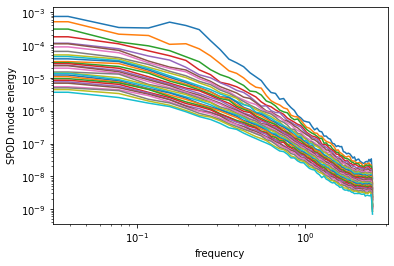

In [4]:
# Plot the SPD spectrum and some modes as before.
# Note that P is a function handle that loads the corresponding modes from
# hard drive since we are in FFT saving mode (lowmem is true).
plt.figure()
plt.loglog(np.array(result["f"]), np.array(result["L"]))
plt.xlabel("frequency")
plt.ylabel("SPOD mode energy")
plt.show()

In [5]:
# Delete saved file
result.close()
os.remove(savefile)